# XGBoost in Regression 

## Importing the libraries 

In [9]:
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

import xgboost as xgb 

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 

## Load and Prepare Data

* Dataset We will be using a dataset that encapsulates the carbon dioxide emissions generated from burning coal for producing electricity power in the United States of America between 1973 and 2016. Using XGBoost, we will try to predict the carbon dioxide emissions in jupyter notebook for the next few years.

In [10]:
path= "/Users/miladebrahimian/Documents/Machine_learning_course/Datasets/CO2.csv"

data= pd.read_csv(path)
data.head()

,YYYYMM,Value
0,197301,72.076
1,197302,64.442
2,197303,64.084
3,197304,60.842
4,197305,61.798


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  523 non-null    int64  
 1   Value   523 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


We use Pandas to import the CSV file. We notice that the dataframe contains a column 'YYYYMM' that needs to be separated into 'Year' and 'Month' column. In this step, we will also remove any null values that we may have in the dataframe. Finally, we will retrieve the last five elements of the dataframe to check if our code worked. And it did!

In [12]:
data['Month']= data.YYYYMM.astype(str).str[4:6].astype(float)
data['Year']= data.YYYYMM.astype(str).str[0:4].astype(float)
data.tail(5)

,YYYYMM,Value,Month,Year
518,201603,72.840,3.0,2016.0
519,201604,71.410,4.0,2016.0
520,201605,82.510,5.0,2016.0
521,201606,115.772,6.0,2016.0
522,201607,135.958,7.0,2016.0


In [13]:
data.drop(['YYYYMM'], axis=1, inplace= True)
data.replace([np.inf, -np.inf], np.nan, inplace= True)

This line of Python code is used to handle infinite values within a dataset, often a DataFrame or Series object from the pandas library. Here’s what each part of the code does:

1. **`data`**: This represents the DataFrame or Series object containing your data.

2. **`replace()`**: This is a method in pandas used to replace certain values. In this case, it's being used to find and replace infinite values.

3. **`[np.inf, -np.inf]`**: This is a list of values that the `replace()` method is looking for within `data`. `np.inf` represents positive infinity, while `-np.inf` represents negative infinity. These values typically occur during calculations that exceed the largest or smallest limits of float precision, like dividing a number by zero.

4. **`np.nan`**: This indicates what the infinite values should be replaced with. `np.nan` stands for "Not a Number" and is a standard way to represent missing or undefined values in numerical data.

5. **`inplace=True`**: This parameter dictates where the changes should be applied directly to the original `data` object. If `inplace` is set to `True`, the method will modify `data` directly and won't return anything. If it were `False` (the default value), it would return a new object with the modifications, leaving the original `data` unchanged.

Overall, this line of code is typically used in data preprocessing to ensure that infinite values do not interfere with subsequent statistical analyses or machine learning algorithms, which may not handle `np.inf` or `-np.inf` values properly.

In [14]:
data.tail(5)

,Value,Month,Year
518,72.840,3.0,2016.0
519,71.410,4.0,2016.0
520,82.510,5.0,2016.0
521,115.772,6.0,2016.0
522,135.958,7.0,2016.0


In [15]:
print(data.dtypes)

Value    float64
Month    float64
Year     float64
dtype: object


In [16]:
data.isnull().sum()

Value    0
Month    0
Year     0
dtype: int64

In [17]:
data.shape

(523, 3)

In [22]:
X= data.loc[:,['Month', 'Year']].values
y= data.loc[:,'Value'].values

In [23]:
X

array([[1.000e+00, 1.973e+03],
       [2.000e+00, 1.973e+03],
       [3.000e+00, 1.973e+03],
       ...,
       [5.000e+00, 2.016e+03],
       [6.000e+00, 2.016e+03],
       [7.000e+00, 2.016e+03]])

In [24]:
y

array([ 72.076,  64.442,  64.084,  60.842,  61.798,  66.538,  72.626,
        75.181,  68.397,  67.668,  67.021,  71.118,  70.55 ,  62.929,
        64.519,  60.544,  64.687,  64.736,  73.698,  72.559,  63.221,
        65.418,  65.593,  71.677,  72.708,  65.117,  66.532,  61.975,
        62.031,  67.875,  74.184,  77.029,  66.156,  66.651,  67.625,
        75.857,  81.264,  71.058,  73.361,  68.703,  68.985,  73.936,
        80.968,  81.962,  72.95 ,  74.746,  78.924,  84.49 ,  87.215,
        75.943,  75.092,  68.641,  74.916,  80.942,  90.667,  89.046,
        80.975,  77.369,  78.058,  83.279,  85.191,  71.476,  67.829,
        69.051,  74.201,  81.372,  88.003,  91.836,  85.066,  79.494,
        79.291,  87.107,  93.946,  83.91 ,  83.689,  78.077,  83.19 ,
        88.15 ,  96.579,  97.246,  84.463,  86.071,  86.09 ,  94.293,
       100.568,  94.862,  93.21 ,  81.245,  82.785,  91.484, 107.126,
       106.245,  95.662,  90.03 ,  91.239, 102.138, 108.164,  94.766,
        95.724,  86.

In [25]:
data_dmatrix= xgb.DMatrix(X,label=y)

The line of code you've provided involves using the XGBoost library, which is a popular machine learning library for regression, classification, and ranking problems. The specific function `xgb.DMatrix()` is used to convert data into a format that is optimized for use with XGBoost models. Here's a breakdown of the components of this line:

1. **`data_dmatrix`**: This is the variable name where the converted data structure will be stored. The `DMatrix` object is now held in `data_dmatrix`.

2. **`xgb.DMatrix()`**: This function creates a `DMatrix` object from input features and labels. `DMatrix` is a specialized data structure provided by XGBoost designed to handle sparse data efficiently and is optimized for both memory efficiency and training speed.

3. **`X`**: This represents the feature matrix or the input variables of your dataset. It's the data that the model will learn from to make predictions. This could be a NumPy array, Pandas DataFrame, or any array-like structure that contains the training features.

4. **`label=y`**: This parameter within the `DMatrix` function specifies the target variable (or labels) associated with the training data. These are the values that the model is trying to predict. The `label` parameter is essential for supervised learning tasks where the goal is to predict an outcome based on input features.

Overall, this line of code is setting up the data for training with an XGBoost model by creating a `DMatrix` object that contains both the features (X) and the labels (y). This setup is typically followed by configuring and training an XGBoost model using this `DMatrix`.

In [26]:
data_dmatrix

In [27]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.2, random_state= 42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(418, 2)
(418,)
(105, 2)
(105,)


### The engineer wound up with these optimized hyperparameters by using GridSearchCV

In [29]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [30]:
#After training the model, we'll check the model training score:

scores= cross_val_score(reg_mod,X_train,y_train,cv= 10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.97


In [31]:
reg_mod.fit(X_train,y_train)

predictions= reg_mod.predict(X_test)

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 7.369991


In [33]:
from sklearn.metrics import r2_score 
r2= np.sqrt(r2_score(y_test,predictions))
print("R_Squared Score: %f" % (r2))

R_Squared Score: 0.974818


* As you can see, the these statistical metrics have reinstated our confidence about this model. RMSE ~ 4.95 R-Squared Score ~ 98.8% Now, let's visualize the original data set using the seaborn library.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Value'>

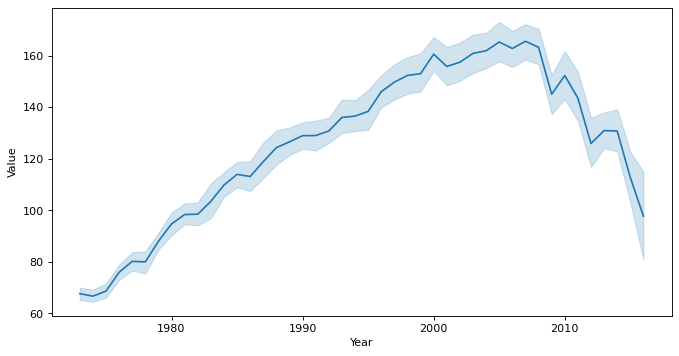

In [34]:
plt.figure(figsize= (10,5), dpi= 80)
sns.lineplot(x= 'Year', y= 'Value', data=data)

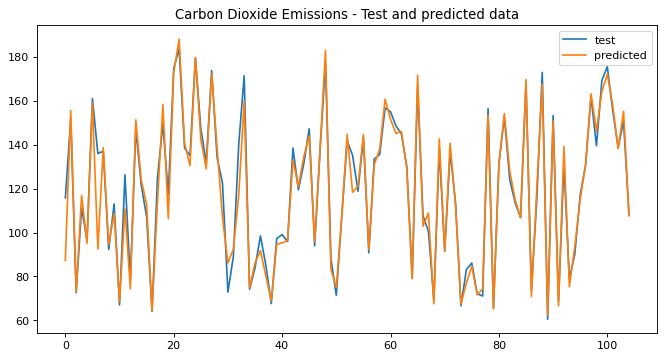

In [36]:
plt.figure(figsize=(10,5), dpi= 80)
x_ax= range(len(y_test))
plt.plot(x_ax, y_test, label= "test")
plt.plot(x_ax, predictions, label= "predicted")
plt.title("Carbon Dioxide Emissions - Test and predicted data")
plt.legend()
plt.show()

The code snippet you've provided involves plotting data using Matplotlib, a popular Python library used for creating static, interactive, and animated visualizations in Python. Here's a breakdown of what each line and command does:

1. **`x_ax = range(len(y_test))`**:
   - `range(len(y_test))` creates an iterable that starts from 0 and extends to the length of `y_test` minus one. Essentially, it generates a sequence of integers from 0 to `len(y_test)-1`. 
   - `x_ax` is assigned this range of integers. This is typically used as the x-axis values for plotting, providing a simple sequence of integers as positions on the x-axis corresponding to each data point in `y_test`.

2. **`plt.plot(x_ax, y_test, label="test")`**:
   - `plt.plot()` is a function from the Matplotlib library that plots y versus x as lines and/or markers.
   - `x_ax` is used as the x-values for the plot. These are the indices of the data points in `y_test`.
   - `y_test` is plotted as the y-values. This array or list presumably contains the test data or the output values that you want to visualize.
   - The `label="test"` argument adds a label to the line being plotted, which is particularly useful when you need a legend to differentiate multiple lines or data sets in the same plot.

This setup is commonly used to visualize how actual test data (or predictions) change over a series of observations. The label "test" indicates that this particular line on the plot represents test data, and when a legend is added to the plot, this label will be used to identify the corresponding line. This can be very useful in contexts such as comparing actual values to predicted values in machine learning tasks, observing trends over time, or simply inspecting the spread of test data.

## Finally, the last piece of code will print the forecasted carbon dioxide emissions until 2025.

In [37]:
predictions 

array([ 87.422066, 155.5562  ,  73.09512 , 116.9044  ,  95.076324,
       158.99072 ,  92.52177 , 138.68584 ,  94.615875, 108.65516 ,
        68.53381 , 110.74693 ,  74.324455, 151.3426  , 124.04132 ,
       112.73166 ,  64.11664 , 114.02178 , 158.28542 , 106.40261 ,
       172.8421  , 187.98691 , 140.67468 , 130.47021 , 179.61574 ,
       142.4486  , 128.96397 , 172.2848  , 138.54399 , 106.75441 ,
        86.159   ,  92.37443 , 117.12348 , 159.89386 ,  74.65828 ,
        86.12563 ,  91.76411 ,  80.165794,  68.95713 ,  94.667496,
        95.292786,  96.33451 , 132.89659 , 120.88632 , 134.43246 ,
       143.87132 ,  95.79598 , 137.76176 , 182.88438 ,  83.243324,
        74.97023 , 106.99924 , 144.65558 , 118.322685, 121.009705,
       144.57256 ,  92.192276, 130.90047 , 137.86676 , 160.7059  ,
       151.60733 , 145.08029 , 146.1159  , 129.18025 ,  78.98816 ,
       171.55907 , 102.86099 , 108.88641 ,  67.559135, 142.61032 ,
        91.40016 , 140.64827 , 112.06845 ,  67.50153 ,  77.011

In [42]:
df= pd.DataFrame(predictions, columns= ['pred'])

In [43]:
df

,pred
0,87.422066
1,155.556198
2,73.095123
3,116.904404
4,95.076324
...,...
100,172.068176
101,157.953522
102,138.229416
103,155.199966


This line of Python code is using the `pandas` library to create a DataFrame from a set of data. Here's a breakdown of each part of the code:

1. **`df = pd.DataFrame(predictions, columns=['pred'])`**:
   - `df` is the variable name assigned to the newly created DataFrame. It's common practice to use short, descriptive names for variables that will hold significant data structures like DataFrames.
   - `pd.DataFrame()` is the constructor for creating a DataFrame object in pandas. DataFrames are versatile data structures that allow for efficient storage and manipulation of tabular data.

2. **`predictions`**:
   - This is the data that you are loading into the DataFrame. In this context, `predictions` likely contains a list or an array of values that represent the output of a model or some computed results. The nature of these predictions isn't specified here, but typically they would be numerical values or categories predicted by a statistical or machine learning model.

3. **`columns=['pred']`**:
   - This argument specifies the names of the columns in the new DataFrame. In this case, there is a single column named `'pred'`.
   - Naming columns is particularly important for clarity and ease of data manipulation, especially when dealing with multiple data sources or when performing data transformations.

Overall, this line of code creates a new DataFrame `df` with one column named `'pred'`, into which the data from `predictions` is loaded. The resulting DataFrame `df` can then be used for further data analysis, visualization, or additional processing within a larger data pipeline. The structure is particularly useful for storing model output in a format that's easy to manipulate, analyze, and visualize.

In [44]:
df['date']= pd.date_range(start= '8/1/2016', periods= len(df), freq= 'M')

This line of Python code is using the `pandas` library to create a new column in an existing DataFrame (`df`) and populating it with a range of dates. Here's the breakdown of each part of the code:

1. **`df['date'] = pd.date_range(start='8/1/2016', periods=len(df), freq='M')`**:
   - **`df['date']`**: This specifies a new column named 'date' in the DataFrame `df`. If the column 'date' already exists, it will be overwritten; if it does not exist, it will be created.

2. **`pd.date_range()`**: This function generates a sequence of dates based on the parameters provided. It is a very flexible and widely used function for creating date indices in pandas.
   - **`start='8/1/2016'`**: This parameter sets the start date of the range. The date range generated will begin from August 1, 2016.
   - **`periods=len(df)`**: The `periods` parameter specifies the number of periods (or points) in the date range. Here, it’s set to the length of the DataFrame `df`, which means the date range will have as many dates as there are rows in the DataFrame. This ensures that each row in the DataFrame will have a corresponding date.
   - **`freq='M'`**: The `freq` parameter determines the frequency of the dates in the range. The 'M' stands for month-end frequency, which means each date generated will be the last day of each month, starting from the date specified in `start`.

The result of this operation is that each row in the DataFrame `df` will be associated with the last day of each consecutive month starting from August 2016. This can be particularly useful for time-series analysis where you need to assign a specific time (end of the month, in this case) to each row of data based on a consistent frequency.

In [45]:
df

,pred,date
0,87.422066,2016-08-31
1,155.556198,2016-09-30
2,73.095123,2016-10-31
3,116.904404,2016-11-30
4,95.076324,2016-12-31
...,...,...
100,172.068176,2024-12-31
101,157.953522,2025-01-31
102,138.229416,2025-02-28
103,155.199966,2025-03-31


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


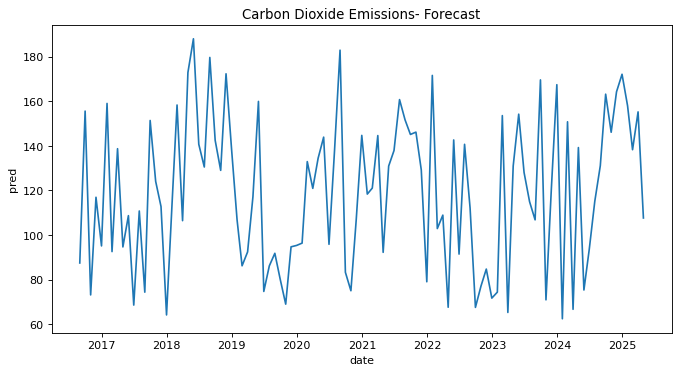

In [46]:
plt.figure(figsize=(10,5), dpi= 80)
sns.lineplot(x= 'date', y= 'pred', data= df)
plt.title("Carbon Dioxide Emissions- Forecast")
plt.show()